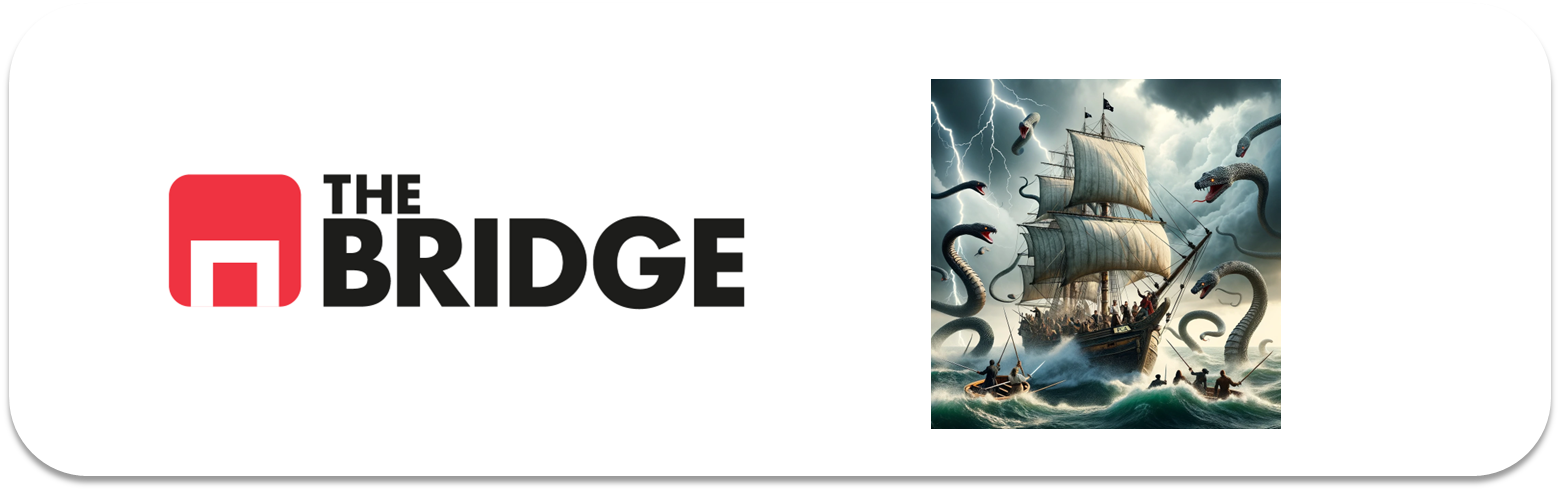

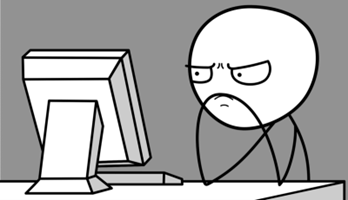

Para ejercitarte y afianzar lo aprendido sobre **Seleccion de Features**, completa los siguientes ejercicios. Recuerda que necesitarás datos que están en el directorio data que acompaña al notebook (búscalo en el repositorio de ejercicios)
  
La solución a los mismos las tienes ya, intenta no mirarlos de primeras pero no dejes de hacerlo cuando hayas terminado por si te pudieran aportar.

## Feature selection: Breast Cancer Winsconsin

El objetivo de este grupo de ejercicio es dar a entender la importancia de la selección de características (features), así como probar distintos métodos de reducción de características (features) y qué influencia puede tener el reducir features en el perfomance de un modelo. Nuestro target para evaluar el perfomance será si estamos ante tumores malignos o benignos.

Vamos a trabajar con el dataset de Breast Cancer Winsconsin, datos tomados a partir de radiografías.

### Ejercicio 0

Importa los paquetes y módulos que necesites a lo largo del notebook

In [22]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import seaborn as sns

from sklearn.model_selection import train_test_split

from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import cross_val_score
from sklearn.metrics import balanced_accuracy_score


### Ejercicio 1:

Carga los datos y haz una primera inspección de los mismos y comenta lo que creas conveniente sobre las features y su relación entre sí (pero sin analizarlas numéricamente)

In [2]:
df = pd.read_csv("/Users/alvarosanchez/ONLINE_DS_THEBRIDGE_ALVAROSMMS-1/ONLINE_DS_THEBRIDGE_ALVAROSMMS/Sprint_14/Unidad_02/Ejercicios_Workout/data/breastcancer-winsconsin.csv")

df.head()

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,...,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst,Unnamed: 32
0,842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,...,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,NaN
1,842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,...,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,NaN
2,84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,...,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,NaN
3,84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,...,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300,NaN
4,84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,...,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678,NaN


In [17]:
df.to_excel("/Users/alvarosanchez/ONLINE_DS_THEBRIDGE_ALVAROSMMS-1/ONLINE_DS_THEBRIDGE_ALVAROSMMS/Sprint_14/Unidad_02/Ejercicios_Workout/data/breastcancer-winsconsin.xlsx", index=False,engine="openpyxl")

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 569 entries, 0 to 568
Data columns (total 33 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   id                       569 non-null    int64  
 1   diagnosis                569 non-null    object 
 2   radius_mean              569 non-null    float64
 3   texture_mean             569 non-null    float64
 4   perimeter_mean           569 non-null    float64
 5   area_mean                569 non-null    float64
 6   smoothness_mean          569 non-null    float64
 7   compactness_mean         569 non-null    float64
 8   concavity_mean           569 non-null    float64
 9   concave points_mean      569 non-null    float64
 10  symmetry_mean            569 non-null    float64
 11  fractal_dimension_mean   569 non-null    float64
 12  radius_se                569 non-null    float64
 13  texture_se               569 non-null    float64
 14  perimeter_se             5

In [4]:
df.describe()

,id,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,...,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst,Unnamed: 32
count,5.690000e+02,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,...,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,0.0
mean,3.037183e+07,14.127292,19.289649,91.969033,654.889104,0.096360,0.104341,0.088799,0.048919,0.181162,...,25.677223,107.261213,880.583128,0.132369,0.254265,0.272188,0.114606,0.290076,0.083946,NaN
std,1.250206e+08,3.524049,4.301036,24.298981,351.914129,0.014064,0.052813,0.079720,0.038803,0.027414,...,6.146258,33.602542,569.356993,0.022832,0.157336,0.208624,0.065732,0.061867,0.018061,NaN
min,8.670000e+03,6.981000,9.710000,43.790000,143.500000,0.052630,0.019380,0.000000,0.000000,0.106000,...,12.020000,50.410000,185.200000,0.071170,0.027290,0.000000,0.000000,0.156500,0.055040,NaN
25%,8.692180e+05,11.700000,16.170000,75.170000,420.300000,0.086370,0.064920,0.029560,0.020310,0.161900,...,21.080000,84.110000,515.300000,0.116600,0.147200,0.114500,0.064930,0.250400,0.071460,NaN
50%,9.060240e+05,13.370000,18.840000,86.240000,551.100000,0.095870,0.092630,0.061540,0.033500,0.179200,...,25.410000,97.660000,686.500000,0.131300,0.211900,0.226700,0.099930,0.282200,0.080040,NaN
75%,8.813129e+06,15.780000,21.800000,104.100000,782.700000,0.105300,0.130400,0.130700,0.074000,0.195700,...,29.720000,125.400000,1084.000000,0.146000,0.339100,0.382900,0.161400,0.317900,0.092080,NaN
max,9.113205e+08,28.110000,39.280000,188.500000,2501.000000,0.163400,0.345400,0.426800,0.201200,0.304000,...,49.540000,251.200000,4254.000000,0.222600,1.058000,1.252000,0.291000,0.663800,0.207500,NaN


### Ejercicio 2:

Descarta las características que evidentemente no aportan información.

In [7]:
df= df.drop(columns=["id", "Unnamed: 32"])

### Ejercicio 3: 

Divide en train y test. Analiza el target de forma breve.

In [9]:
X = df.drop(columns=["diagnosis"])
y = df["diagnosis"]

X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.2, stratify=y, random_state=42)

/var/folders/pp/htctz74j4zx_4s8mzg9b8h6m0000gn/T/ipykernel_4843/2284582144.py:1: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x=y_train, palette="coolwarm")


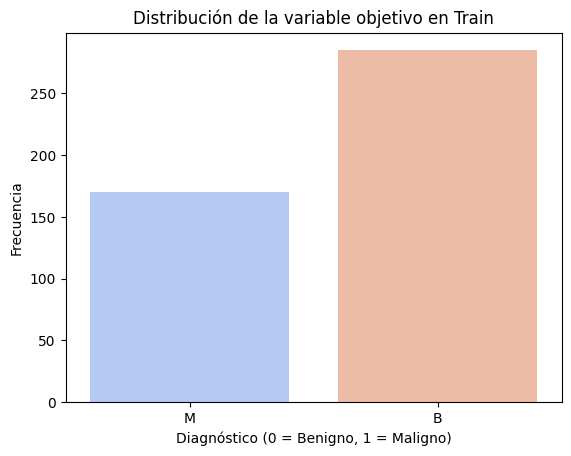

In [18]:
sns.countplot(x=y_train, palette="coolwarm")
plt.title("Distribución de la variable objetivo en Train")
plt.xlabel("Diagnóstico (0 = Benigno, 1 = Maligno)")
plt.ylabel("Frecuencia")
plt.show()


In [15]:
print("Distribución en Train:\n", y_train.value_counts(normalize=True))
print("\nDistribución en Test:\n", y_test.value_counts(normalize=True))

Distribución en Train:
 diagnosis
B    0.626374
M    0.373626
Name: proportion, dtype: float64

Distribución en Test:
 diagnosis
B    0.631579
M    0.368421
Name: proportion, dtype: float64


### Ejercicio 4: MiniEDA (I) Análisis Visual

Realiza un análisis visual de las features y haz tu selección de primera "división" (que luego usaremos para comparar con otros métodos de selección).

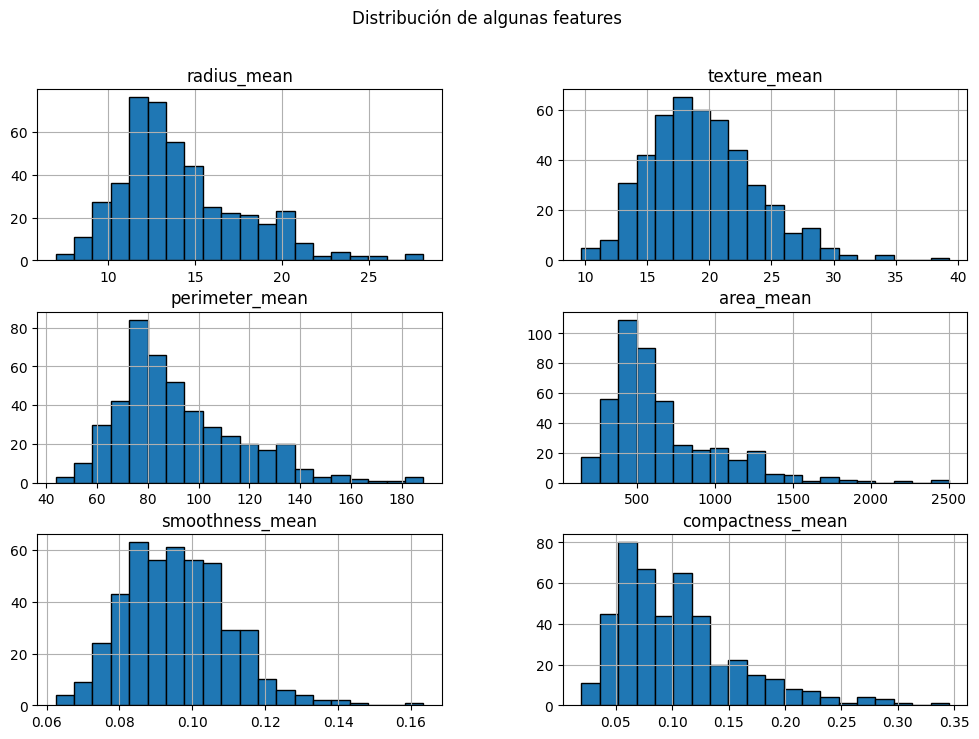

In [19]:

selected_features = X_train.columns[:6]


X_train[selected_features].hist(figsize=(12, 8), bins=20, edgecolor="black")
plt.suptitle("Distribución de algunas features")
plt.show()


### Ejercicio 5

Observa correlaciones entre las features. Utiliza un gráfico apropiado para ello. ¿Crees que sea posible eliminar algunas features para mejorar el modelo? (No hace falta que lo hagas ahora, lo haremos si es necesario en un ejercicio posterior)

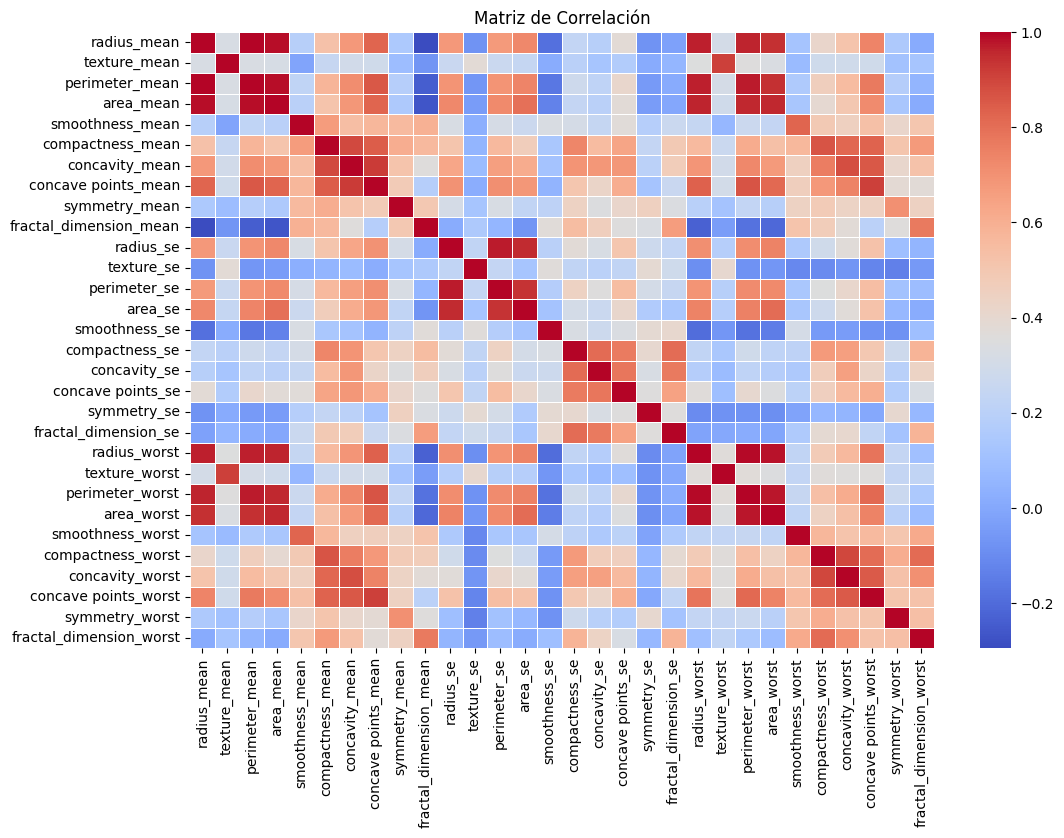

In [20]:
plt.figure(figsize=(12, 8))
sns.heatmap(X_train.corr(), cmap="coolwarm", annot=False, linewidths=0.5)
plt.title("Matriz de Correlación")
plt.show()

radius_mean, perimeter_mean y area_mean

concavity_mean, concave points_mean y compactness_mean

### Ejercicio 6:

Entrena (con validación cruzada) un modelo de RandomForestClassifier (con max_depth a 5) con todas las features (ojo incluso las que descartamos en el ejercicio 4) y guarda el perfomance ("balanced_accuracy") en test en una variable. Será nuestro base line de comparación

In [23]:

# Modelo baseline
clf = RandomForestClassifier(max_depth=5, random_state=42)
cv_scores = cross_val_score(clf, X_train, y_train, cv=5, scoring="balanced_accuracy")

# Evaluar en test
clf.fit(X_train, y_train)
y_pred = clf.predict(X_test)
test_score = balanced_accuracy_score(y_test, y_pred)

baseline_accuracy = test_score 
print(f"Balanced Accuracy (Baseline): {baseline_accuracy:.4f}")


Balanced Accuracy (Baseline): 0.9643


### Ejercicio 7

Vamos a emplear nuestras features del análisis visual pero descartando variables correladas entre sí (emplea la matriz ya obtenida en el ejercicio 5 o bien cualquier medio que creas conveniente). Descarta features y muestra la matriz de correlación para la selección final (recuerda, parte de la lista creada en el ejercicio 4)

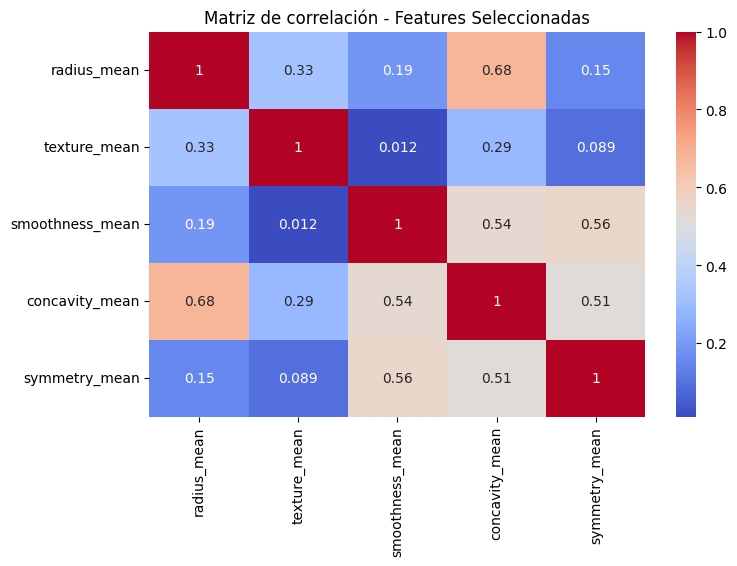

In [24]:
# Lista de features seleccionadas en el Ejercicio 4
selected_features = ["radius_mean", "texture_mean", "smoothness_mean", "concavity_mean", "symmetry_mean"]

# Filtrar por correlación
corr_matrix = X_train[selected_features].corr().abs()
plt.figure(figsize=(8, 5))
sns.heatmap(corr_matrix, annot=True, cmap="coolwarm")
plt.title("Matriz de correlación - Features Seleccionadas")
plt.show()


### Ejercicio 8

Evalúa tu primer feature reduction. Entrena un modelo y evalúa su perfomance con los features que seleccionaste en el ejercicio anterios (emplea la validación cruzada)

In [25]:
X_train_reduced = X_train[selected_features]
X_test_reduced = X_test[selected_features]

# Modelo con selección de features manual
clf = RandomForestClassifier(max_depth=5, random_state=42)
cv_scores = cross_val_score(clf, X_train_reduced, y_train, cv=5, scoring="balanced_accuracy")

# Evaluar en test
clf.fit(X_train_reduced, y_train)
y_pred = clf.predict(X_test_reduced)
test_score_reduced = balanced_accuracy_score(y_test, y_pred)

print(f"Balanced Accuracy (Modelo Reducido): {test_score_reduced:.4f}")

Balanced Accuracy (Modelo Reducido): 0.9216


### Ejercicio 9

Prueba ahora a hacer una feature selection utilizando ANOVA. Compara la validación cruzada con la del modelo baseline y con la del modelo anterior. (Pista: SelectKbest)

In [26]:
from sklearn.feature_selection import SelectKBest, f_classif

# Seleccionar las mejores k features
selector = SelectKBest(score_func=f_classif, k=5)
X_train_anova = selector.fit_transform(X_train, y_train)
X_test_anova = selector.transform(X_test)

# Evaluar modelo
clf = RandomForestClassifier(max_depth=5, random_state=42)
cv_scores = cross_val_score(clf, X_train_anova, y_train, cv=5, scoring="balanced_accuracy")
clf.fit(X_train_anova, y_train)
y_pred_anova = clf.predict(X_test_anova)
test_score_anova = balanced_accuracy_score(y_test, y_pred_anova)

print(f"Balanced Accuracy (ANOVA Selection): {test_score_anova:.4f}")

Balanced Accuracy (ANOVA Selection): 0.9335


### Ejercicio 10

Prueba a hacer ahora una selección de features con RFE (Recursive Feature Elimination), hasta quedarte con 5 features. Evalúa perfomance en "balanced_accuracy" con cross_validation y compara con la baseline.

In [32]:
from sklearn.feature_selection import RFE
from sklearn.linear_model import LogisticRegression
from sklearn.feature_selection import SelectFromModel

# Modelo base para RFE
model_rfe = LogisticRegression(max_iter=5000, random_state=42)

# Aplicar RFE para seleccionar 5 features
rfe = RFE(model_rfe, n_features_to_select=5)
X_train_rfe = rfe.fit_transform(X_train, y_train)
X_test_rfe = rfe.transform(X_test)

# Evaluar modelo con las features seleccionadas por RFE
clf = RandomForestClassifier(max_depth=5, random_state=42)
cv_scores_rfe = cross_val_score(clf, X_train_rfe, y_train, cv=5, scoring="balanced_accuracy")

clf.fit(X_train_rfe, y_train)
y_pred_rfe = clf.predict(X_test_rfe)
test_score_rfe = balanced_accuracy_score(y_test, y_pred_rfe)

print(f"Balanced Accuracy (RFE - 5 Features): {test_score_rfe:.4f}")

# Obtener las features seleccionadas por RFE
selected_features_rfe = X_train.columns[rfe.support_]
print("Features seleccionadas por RFE:", selected_features_rfe.tolist())

Balanced Accuracy (RFE - 5 Features): 0.9097
Features seleccionadas por RFE: ['radius_mean', 'texture_se', 'radius_worst', 'compactness_worst', 'concavity_worst']


### Ejercicio 11

Prueba a eliminar features con el modelo de RandomForestClassifier (emplea SelectFromModel de sklearn). Utiliza esta vez una regresión logística para entrenar con las features escogidas y compara con el baseline. Muestra primero la importancia obtenida con el modelo baseline (que básicamente es el mismo que vamos a usar con SelectFromModel). Prueba primero para features por encima de la mediana y luego para las 5 primeras.

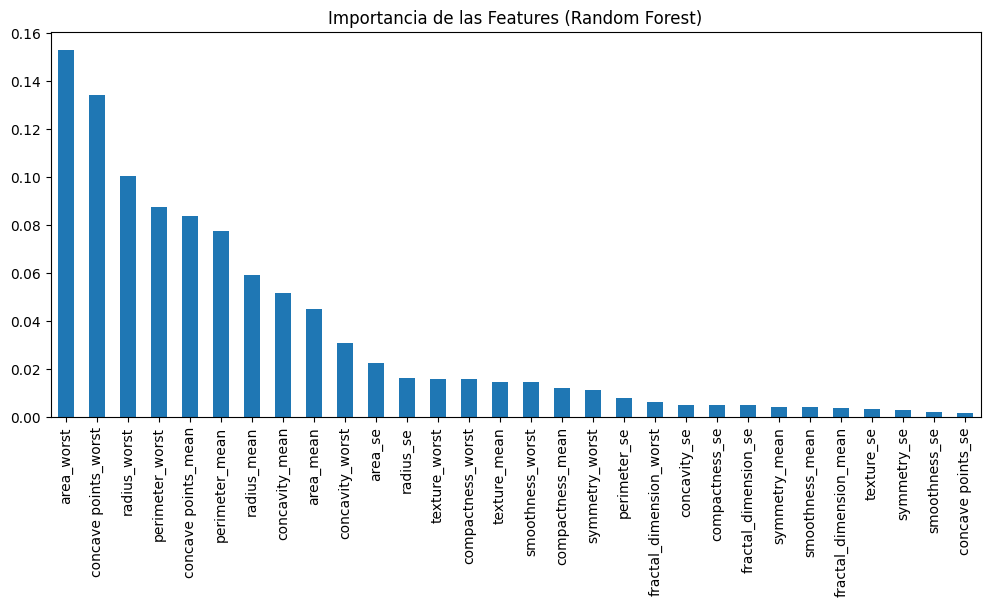

In [28]:
# Entrenar modelo base para obtener importancia de las features
clf_rf = RandomForestClassifier(max_depth=5, random_state=42)
clf_rf.fit(X_train, y_train)

# Obtener la importancia de cada feature
feature_importances = pd.Series(clf_rf.feature_importances_, index=X_train.columns)

# Visualizar la importancia de las features
plt.figure(figsize=(12, 5))
feature_importances.sort_values(ascending=False).plot(kind="bar")
plt.title("Importancia de las Features (Random Forest)")
plt.show()

In [33]:
# Aplicar SelectFromModel para seleccionar features con importancia mayor a la mediana
selector = SelectFromModel(clf_rf, threshold="median", prefit=True)
X_train_sf = selector.transform(X_train)
X_test_sf = selector.transform(X_test)

# Evaluar modelo con las features seleccionadas
clf = LogisticRegression(max_iter=5000, random_state=42)
cv_scores_sf = cross_val_score(clf, X_train_sf, y_train, cv=5, scoring="balanced_accuracy")

clf.fit(X_train_sf, y_train)
y_pred_sf = clf.predict(X_test_sf)
test_score_sf = balanced_accuracy_score(y_test, y_pred_sf)

print(f"Balanced Accuracy (SelectFromModel - Features > Mediana): {test_score_sf:.4f}")

# Obtener las features seleccionadas
selected_features_sf = X_train.columns[selector.get_support()]
print("Features seleccionadas por SelectFromModel (Mediana):", selected_features_sf.tolist())

/opt/homebrew/lib/python3.11/site-packages/sklearn/utils/validation.py:2732: UserWarning: X has feature names, but SelectFromModel was fitted without feature names
  warnings.warn(
/opt/homebrew/lib/python3.11/site-packages/sklearn/utils/validation.py:2732: UserWarning: X has feature names, but SelectFromModel was fitted without feature names
  warnings.warn(


Balanced Accuracy (SelectFromModel - Features > Mediana): 0.9335
Features seleccionadas por SelectFromModel (Mediana): ['radius_mean', 'texture_mean', 'perimeter_mean', 'area_mean', 'concavity_mean', 'concave points_mean', 'radius_se', 'area_se', 'radius_worst', 'texture_worst', 'perimeter_worst', 'area_worst', 'compactness_worst', 'concavity_worst', 'concave points_worst']


In [30]:
# Aplicar SelectFromModel para seleccionar solo las 5 features más importantes
top_5_features = feature_importances.nlargest(5).index
X_train_top5 = X_train[top_5_features]
X_test_top5 = X_test[top_5_features]

# Evaluar modelo con solo las 5 features más importantes
clf = LogisticRegression(max_iter=2000, random_state=42)
cv_scores_top5 = cross_val_score(clf, X_train_top5, y_train, cv=5, scoring="balanced_accuracy")

clf.fit(X_train_top5, y_train)
y_pred_top5 = clf.predict(X_test_top5)
test_score_top5 = balanced_accuracy_score(y_test, y_pred_top5)

print(f"Balanced Accuracy (Top 5 Features - SelectFromModel): {test_score_top5:.4f}")
print("Top 5 Features seleccionadas:", top_5_features.tolist())

Balanced Accuracy (Top 5 Features - SelectFromModel): 0.8671
Top 5 Features seleccionadas: ['area_worst', 'concave points_worst', 'radius_worst', 'perimeter_worst', 'concave points_mean']


### Ejercicio EXTRA:

Investiga RFECV y obten el número optimo de features siguiendo esta técnica pero con el "balanced_accuracy" como métrica.

Balanced Accuracy (RFECV - Features Óptimas): 0.9692
Número óptimo de features según RFECV: 19
Features seleccionadas por RFECV: ['radius_mean', 'texture_mean', 'area_mean', 'concavity_mean', 'concave points_mean', 'radius_se', 'perimeter_se', 'area_se', 'compactness_se', 'concave points_se', 'fractal_dimension_se', 'radius_worst', 'texture_worst', 'perimeter_worst', 'area_worst', 'smoothness_worst', 'concavity_worst', 'concave points_worst', 'symmetry_worst']


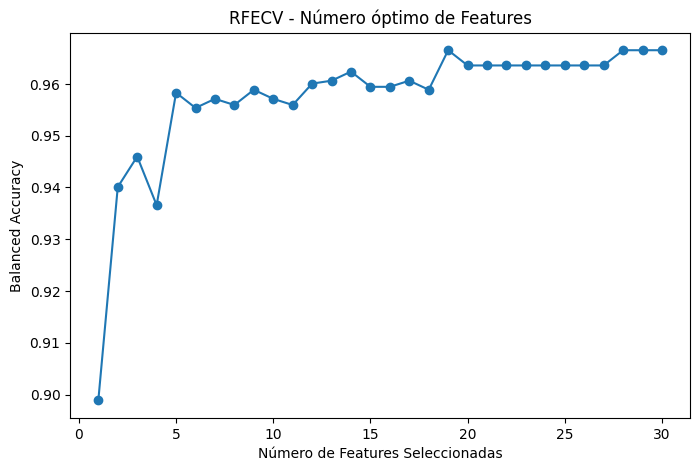

In [40]:
from sklearn.feature_selection import RFECV
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression

# Escalar los datos antes de entrenar el modelo
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Usamos un clasificador base para RFECV
model_rfecv = LogisticRegression(max_iter=2000, random_state=42)

# Aplicamos RFECV con validación cruzada para determinar el número óptimo de features
rfecv = RFECV(model_rfecv, step=1, cv=5, scoring="balanced_accuracy")
rfecv.fit(X_train_scaled, y_train)

# Transformar los datos con las features seleccionadas por RFECV
X_train_rfecv = rfecv.transform(X_train_scaled)
X_test_rfecv = rfecv.transform(X_test_scaled)

# Evaluar modelo con las features seleccionadas por RFECV
clf = LogisticRegression(max_iter=10000, random_state=42)
cv_scores_rfecv = cross_val_score(clf, X_train_rfecv, y_train, cv=5, scoring="balanced_accuracy")

clf.fit(X_train_rfecv, y_train)
y_pred_rfecv = clf.predict(X_test_rfecv)
test_score_rfecv = balanced_accuracy_score(y_test, y_pred_rfecv)

print(f"Balanced Accuracy (RFECV - Features Óptimas): {test_score_rfecv:.4f}")

# Obtener número óptimo de features con RFECV
optimal_features_rfecv = X_train.columns[rfecv.support_]

print("Número óptimo de features según RFECV:", len(optimal_features_rfecv))
print("Features seleccionadas por RFECV:", optimal_features_rfecv.tolist())

# # Visualizar el número óptimo de features
plt.figure(figsize=(8, 5))
plt.plot(range(1, len(rfecv.cv_results_["mean_test_score"]) + 1),
          rfecv.cv_results_["mean_test_score"], marker="o")
plt.xlabel("Número de Features Seleccionadas")
plt.ylabel("Balanced Accuracy")
plt.title("RFECV - Número óptimo de Features")
plt.show()
